In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
singledata = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
singledata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mousenumber = singledata["Mouse ID"].value_counts()
mousenumber = len(mousenumber)
mousenumber

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = singledata.loc[singledata.duplicated( subset= ["Mouse ID","Timepoint"])]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#checking number of duplicates with Mouse ID g989
duplicateID = singledata.loc[singledata["Mouse ID"]=="g989"]
duplicateID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#mouse data without Mouse ID g989
cleandata= singledata.loc[singledata["Mouse ID"]!="g989"]
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Get all the data for the duplicate mouse ID...Timepoint's are different
duplicate_data = singledata[singledata.duplicated(["Mouse ID"])]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
nmiceclean = cleandata['Mouse ID'].value_counts()
len(nmiceclean)

248

In [8]:
#Clean data:  Tumor volume:  mean, median, variance, Std, SEM 

In [9]:
mean = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
median = singledata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
variance = cleandata.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
std = cleandata.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
sem = cleandata.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#Total number of measurements for each treatment regimen
summarytable = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': std, 'Standard Error of Measurement': sem })
summarytable

,Mean,Median,Variance,Standard Deviation,Standard Error of Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.854632,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


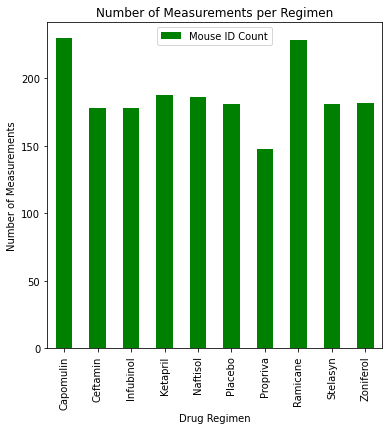

In [15]:
# bar plot using pandas
bar = cleandata.groupby(["Drug Regimen"]).count().reset_index()
twocat = bar[["Drug Regimen", "Mouse ID"]]
twocat= twocat.rename(columns = {"Mouse ID":"Mouse ID Count"})
twocat = twocat.set_index("Drug Regimen")
twocat.plot(kind ='bar', color = 'g', figsize = (6,6))
plt.title ('Number of Measurements per Regimen')
plt.ylabel('Number of Measurements')

plt.show()


In [16]:
#bar plot using pyplot as plt
numberdrug = cleandata.groupby("Drug Regimen")["Mouse ID"].count()
numberlist = numberdrug.tolist()
numberlist

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

In [17]:
#10 labels on x-axis
x_axis = np.arange(len(numberlist))

In [18]:
#10 drug names on x_axis
drugnames = summarytable.index.tolist()
drugnames

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

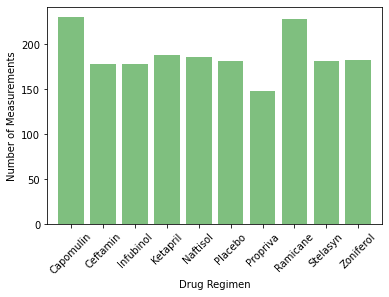

In [19]:
x_axis  = drugnames
plt.bar(x_axis, numberlist, color = 'g', align = 'center', alpha = 0.5)
plt.xlabel ('Drug Regimen')
plt.ylabel('Number of Measurements')

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, drugnames)
plt.xticks(rotation = 45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()

In [20]:
#pie plot of male vs female pandas
cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
#Dataframe of Male to Female 
sexid =pd.DataFrame(cleandata.groupby(['Sex']).count()).reset_index()
sexid

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [22]:
#Have to reset index to filter to two columns
sexid2 = sexid[["Sex", "Mouse ID"]].rename(columns= {"Mouse ID":"Mouse ID count"})
sexid2

,Sex,Mouse ID count
0,Female,922
1,Male,958


Text(0.5, 1.0, 'Male vs Female Mouse Count')

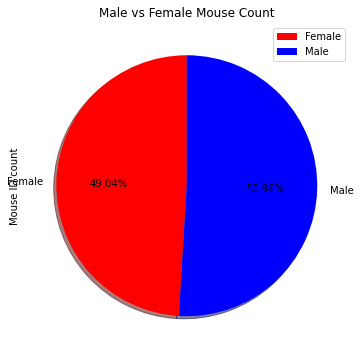

In [23]:
sexid2.plot(kind ='pie', y = "Mouse ID count", autopct='%1.2f%%', figsize = (6,6), startangle = 90, shadow= True, colors = ['red', 'blue'], labels = sexid2["Sex"])
plt.title('Male vs Female Mouse Count')

In [24]:
#pie plot of male vs female pyplot

In [25]:
labels = sexid2["Sex"]
sizes = sexid2["Mouse ID count"]
colors = ["red", "blue"]
explode = (0.1,0)

Text(0.5, 1.0, 'Male vs Female Mouse Count')

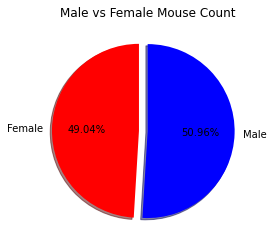

In [26]:
plt.pie(sizes, explode = explode, labels =labels, colors = colors, autopct ="%1.2f%%", shadow = True, startangle =90)
plt.title ('Male vs Female Mouse Count')

In [27]:
#Final tumor Volume for: Capomulin, Ramicane, Infubinol, and Ceftamin
#Calculate the quartiles and IQR

cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
#Creates list of 3 categories: Drug Regimen, Mouse ID, Timepoint
groups = cleandata.sort_values(["Drug Regimen", "Timepoint", "Mouse ID"], ascending =True).reset_index()
groups

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,300,b128,Capomulin,Female,9,22,0,45.000000,0
1,290,b742,Capomulin,Male,7,21,0,45.000000,0
2,60,f966,Capomulin,Male,16,17,0,45.000000,0
3,235,g288,Capomulin,Male,3,19,0,45.000000,0
4,351,g316,Capomulin,Female,22,22,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
1875,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1876,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1877,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1878,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [38]:
endmouse = groups.loc[groups["Timepoint"]==45]
endmouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
209,309,b128,Capomulin,Female,9,22,45,38.982878,2
210,299,b742,Capomulin,Male,7,21,45,38.939633,0
211,244,g288,Capomulin,Male,3,19,45,37.074024,1
212,360,g316,Capomulin,Female,22,22,45,40.159220,2
213,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
1875,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1876,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1877,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1878,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [46]:
###Capomulin data to dataframe
capomulin = endmouse[endmouse["Drug Regimen"]=="Capomulin"]
capomulin

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
209,309,b128,Capomulin,Female,9,22,45,38.982878,2
210,299,b742,Capomulin,Male,7,21,45,38.939633,0
211,244,g288,Capomulin,Male,3,19,45,37.074024,1
212,360,g316,Capomulin,Female,22,22,45,40.159220,2
213,440,i557,Capomulin,Female,1,24,45,47.685963,1
214,204,i738,Capomulin,Female,23,20,45,37.311846,2
215,337,j119,Capomulin,Female,7,23,45,38.125164,1
216,380,l509,Capomulin,Male,17,21,45,41.483008,3
217,282,l897,Capomulin,Male,17,19,45,38.846876,1
218,39,m601,Capomulin,Male,22,17,45,28.430964,1


In [63]:
#Capomulin data to dataframe from least to greatest .sortvalues
capframe = capomulin.sort_values(['Tumor Volume (mm3)'], ascending = True)
capframe = capframe["Tumor Volume (mm3)"]
capframe

222    23.343598
218    28.430964
228    28.484033
225    31.023923
229    31.896238
220    32.377357
219    33.329098
224    34.455298
227    36.041047
211    37.074024
214    37.311846
215    38.125164
217    38.846876
210    38.939633
209    38.982878
212    40.159220
226    40.658124
223    40.728578
216    41.483008
221    41.581521
213    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
#Quartiles, Lower Quartile, Upper Quartile, IQR, lower bound, upper bound
#use .quantile for quartile

In [76]:
quartile = capframe.quantile([.25,.5,.75])
lq = quartile[.25]
uq = quartile[.75]
iqr = uq-lq
lowerb = lq - (1.5*iqr)
upperb = uq + (1.5*iqr)

In [77]:
print (f"The Lower Quartile is equal to {lq}")

The Lower Quartile is equal to 32.37735684


In [78]:
print (f"The Upper Quartile is equal to {uq}")

The Upper Quartile is equal to 40.1592203


In [79]:
print (f"The Interquartile Range is equal to {iqr}")

The Interquartile Range is equal to 7.781863460000004


In [80]:
print (f"The Median is equal to {capframe.median()}")

The Median is equal to 37.31184577


In [81]:
print (f"Any value below {lowerb} is a potential outlier.")
print (f"Any value above {upperb} is a potential outlier.")

Any value below 20.70456164999999 is a potential outlier.
Any value above 51.83201549 is a potential outlier.


In [82]:
#box and whisker plot for data

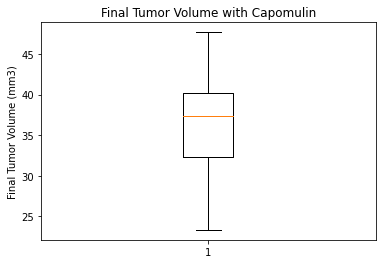

In [111]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume with Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capframe)
plt.show()

In [121]:
#no outliers
capframe

222    23.343598
218    28.430964
228    28.484033
225    31.023923
229    31.896238
220    32.377357
219    33.329098
224    34.455298
227    36.041047
211    37.074024
214    37.311846
215    38.125164
217    38.846876
210    38.939633
209    38.982878
212    40.159220
226    40.658124
223    40.728578
216    41.483008
221    41.581521
213    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [114]:
ramicane = endmouse[endmouse["Drug Regimen"]=="Ramicane"]
ramicane

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1497,327,a411,Ramicane,Male,3,22,45,38.407618,1
1498,430,a444,Ramicane,Female,10,25,45,43.047543,0
1499,214,a520,Ramicane,Male,13,21,45,38.810366,1
1500,174,a644,Ramicane,Female,7,17,45,32.978522,1
1501,154,c758,Ramicane,Male,9,17,45,33.397653,1
1502,272,d251,Ramicane,Female,8,19,45,37.311236,2
1503,400,e662,Ramicane,Male,8,24,45,40.659006,2
1504,49,g791,Ramicane,Male,11,16,45,29.128472,1
1505,184,i177,Ramicane,Male,10,18,45,33.562402,3
1506,254,i334,Ramicane,Female,8,20,45,36.374510,2


In [135]:
ramframe = ramicane.sort_values(['Tumor Volume (mm3)'], ascending = True)
ramframe = ramframe["Tumor Volume (mm3)"]
ramframe

1509    22.050126
1504    29.128472
1514    30.276232
1510    30.564625
1516    30.638696
1511    31.095335
1507    31.560470
1500    32.978522
1501    33.397653
1505    33.562402
1508    36.134852
1506    36.374510
1513    37.225650
1502    37.311236
1497    38.407618
1499    38.810366
1503    40.659006
1515    40.667713
1498    43.047543
1512    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [136]:
quartile2 = ramframe.quantile([.25,.5,.75])
lq2 = quartile2[.25]
uq2 = quartile2[.75]
iqr2 = uq2-lq2
lowerb2 = lq2 - (1.5*iqr2)
upperb2 = uq2 + (1.5*iqr2)

In [137]:
print (f"The Lower Quartile is equal to {lq2}")
print (f"The Upper Quartile is equal to {uq2}")
print (f"The Interquartile Range is equal to {iqr2}")
print (f"The Median is equal to {ramframe.median()}")
print (f"Any value below {lowerb2} is a potential outlier.")
print (f"Any value above {upperb2} is a potential outlier.")

The Lower Quartile is equal to 30.981175224999998
The Upper Quartile is equal to 38.508305307499995
The Interquartile Range is equal to 7.527130082499998
The Median is equal to 34.848627300000004
Any value below 19.690480101250003 is a potential outlier.
Any value above 49.79900043124999 is a potential outlier.


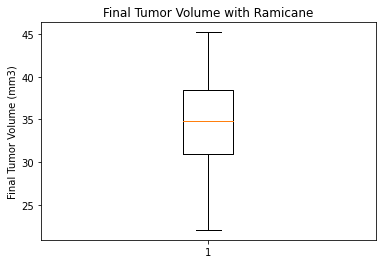

In [138]:
#box and whisker for Ramicane
fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volume with Ramicane')
ax2.set_ylabel('Final Tumor Volume (mm3)')
ax2.boxplot(ramframe)
plt.show()

In [139]:
#no outliers
ramframe

1509    22.050126
1504    29.128472
1514    30.276232
1510    30.564625
1516    30.638696
1511    31.095335
1507    31.560470
1500    32.978522
1501    33.397653
1505    33.562402
1508    36.134852
1506    36.374510
1513    37.225650
1502    37.311236
1497    38.407618
1499    38.810366
1503    40.659006
1515    40.667713
1498    43.047543
1512    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [140]:
infubinol = endmouse[endmouse["Drug Regimen"]=="Infubinol"]
infubinol

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
577,463,a203,Infubinol,Female,20,23,45,67.973419,2
578,473,a251,Infubinol,Female,21,25,45,65.525743,1
579,540,a685,Infubinol,Male,8,30,45,66.083066,3
580,637,c139,Infubinol,Male,11,28,45,72.226731,2
581,800,e476,Infubinol,Male,23,26,45,62.435404,1
582,834,f345,Infubinol,Male,23,26,45,60.918767,1
583,1053,k483,Infubinol,Female,20,30,45,66.196912,3
584,1813,y163,Infubinol,Female,17,27,45,67.685569,3
585,1872,z581,Infubinol,Female,24,25,45,62.754451,3


In [141]:
inframe = infubinol.sort_values(['Tumor Volume (mm3)'], ascending = True)
inframe = inframe["Tumor Volume (mm3)"]
inframe

582    60.918767
581    62.435404
585    62.754451
578    65.525743
579    66.083066
583    66.196912
584    67.685569
577    67.973419
580    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [142]:
quartile3 = inframe.quantile([.25,.5,.75])
lq3 = quartile3[.25]
uq3 = quartile3[.75]
iqr3 = uq3-lq3
lowerb3 = lq3 - (1.5*iqr3)
upperb3 = uq3 + (1.5*iqr3)

In [143]:
print (f"The Lower Quartile is equal to {lq3}")
print (f"The Upper Quartile is equal to {uq3}")
print (f"The Interquartile Range is equal to {iqr3}")
print (f"The Median is equal to {inframe.median()}")
print (f"Any value below {lowerb3} is a potential outlier.")
print (f"Any value above {upperb3} is a potential outlier.")

The Lower Quartile is equal to 62.75445141
The Upper Quartile is equal to 67.68556862
The Interquartile Range is equal to 4.9311172099999965
The Median is equal to 66.08306589
Any value below 55.35777559500001 is a potential outlier.
Any value above 75.08224443499999 is a potential outlier.


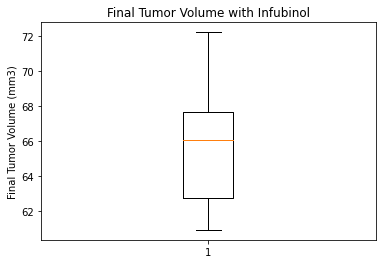

In [144]:
fig3, ax3 = plt.subplots()
ax3.set_title('Final Tumor Volume with Infubinol')
ax3.set_ylabel('Final Tumor Volume (mm3)')
ax3.boxplot(inframe)
plt.show()

In [145]:
#no outliers
inframe

582    60.918767
581    62.435404
585    62.754451
578    65.525743
579    66.083066
583    66.196912
584    67.685569
577    67.973419
580    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [146]:
ceftamin = endmouse[endmouse["Drug Regimen"]=="Ceftamin"]
ceftamin

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
395,493,a275,Ceftamin,Female,20,28,45,62.999356,3
396,993,j296,Ceftamin,Female,24,30,45,61.849023,3
397,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
398,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
399,1132,l661,Ceftamin,Male,18,26,45,59.851956,3
400,1162,l733,Ceftamin,Female,4,30,45,64.299830,1
401,1260,o287,Ceftamin,Male,2,28,45,59.741901,4
402,1379,p438,Ceftamin,Female,11,26,45,61.433892,1
403,1670,w151,Ceftamin,Male,24,25,45,67.527482,3
404,1773,x581,Ceftamin,Female,19,28,45,64.634949,3


In [147]:
ceftframe = ceftamin.sort_values(['Tumor Volume (mm3)'], ascending = True)
ceftframe = ceftframe["Tumor Volume (mm3)"]
ceftframe

401    59.741901
399    59.851956
405    61.386660
402    61.433892
396    61.849023
395    62.999356
400    64.299830
404    64.634949
407    64.729837
403    67.527482
398    67.748662
406    68.594745
397    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [148]:
quartile4 = ceftframe.quantile([.25,.5,.75])
lq4 = quartile4[.25]
uq4 = quartile4[.75]
iqr4 = uq4-lq4
lowerb4 = lq4 - (1.5*iqr4)
upperb4 = uq4 + (1.5*iqr4)

In [149]:
print (f"The Lower Quartile is equal to {lq4}")
print (f"The Upper Quartile is equal to {uq4}")
print (f"The Interquartile Range is equal to {iqr4}")
print (f"The Median is equal to {ceftframe.median()}")
print (f"Any value below {lowerb4} is a potential outlier.")
print (f"Any value above {upperb4} is a potential outlier.")

The Lower Quartile is equal to 61.43389223
The Upper Quartile is equal to 67.52748237
The Interquartile Range is equal to 6.093590140000003
The Median is equal to 64.29983003
Any value below 52.29350701999999 is a potential outlier.
Any value above 76.66786758 is a potential outlier.


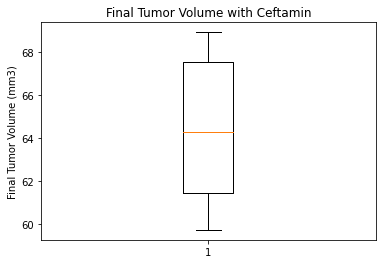

In [150]:
fig4, ax4 = plt.subplots()
ax4.set_title('Final Tumor Volume with Ceftamin')
ax4.set_ylabel('Final Tumor Volume (mm3)')
ax4.boxplot(ceftframe)
plt.show()

In [151]:
#no outliers
ceftframe

401    59.741901
399    59.851956
405    61.386660
402    61.433892
396    61.849023
395    62.999356
400    64.299830
404    64.634949
407    64.729837
403    67.527482
398    67.748662
406    68.594745
397    68.923185
Name: Tumor Volume (mm3), dtype: float64

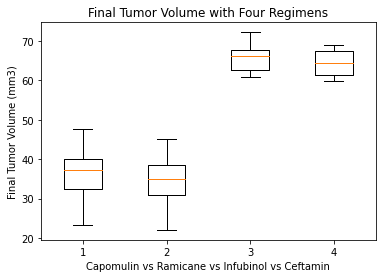

In [170]:
#all scatter plots 
boxes= [capframe, ramframe, inframe, ceftframe]
fig5, ax5 = plt.subplots()
ax5.set_title('Final Tumor Volume with Four Regimens')
ax5.set_ylabel('Final Tumor Volume (mm3)')
ax5.set_xlabel('Capomulin vs Ramicane vs Infubinol vs Ceftamin')
ax5.boxplot(boxes)
plt.show()

In [174]:
# Compare One mouse using Capomulin
capomulin = cleandata.loc[cleandata["Drug Regimen"]=="Capomulin"]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [175]:
capmouse= capomulin.loc[capomulin["Mouse ID"]== 'b128']
capmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2
